In [90]:
# Supressing the warning messages
import warnings
warnings.simplefilter('ignore')

In [91]:
!pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import plotting
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score,accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from featurewiz import featurewiz
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler,LabelEncoder, PolynomialFeatures, MinMaxScaler
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb

# for visualizations
# import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import ConfusionMatrixDisplay
# from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


# for path
import os

# for pandas printing 
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# Explore Data

In [93]:
data = pd.read_csv('/content/crimedata.csv', encoding='latin-1',na_values=["?"])
data

Êcommunityname state  countyCode  communityCode  fold  \
0     BerkeleyHeightstownship    NJ        39.0         5320.0     1   
1              Marpletownship    PA        45.0        47616.0     1   
2                  Tigardcity    OR         NaN            NaN     1   
3            Gloversvillecity    NY        35.0        29443.0     1   
4                 Bemidjicity    MN         7.0         5068.0     1   
...                       ...   ...         ...            ...   ...   
2210               Mercedcity    CA         NaN            NaN    10   
2211            Pinevillecity    LA         NaN            NaN    10   
2212              Yucaipacity    CA         NaN            NaN    10   
2213             Beevillecity    TX         NaN            NaN    10   
2214       WestSacramentocity    CA         NaN            NaN    10   

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          11980           3.10          1.37         91.78          6.50   
1          23123           2.82          0.80         95.57          3.44   
2          29344           2.43          0.74         94.33          3.43   
3          16656           2.40          1.70         97.35          0.50   
4          11245           2.76          0.53         89.16          1.17   
...          ...            ...           ...           ...           ...   
2210       56216           3.07          6.87         61.68         15.23   
2211       12251           2.68         21.18         76.65          1.52   
2212       32824           2.46          0.52         92.62          0.98   
2213       13547           2.89          3.37         69.91          0.90   
2214       28898           2.61          2.39         71.27          9.09   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0            1.88        12.47        21.44        10.93       11.33   
1            0.85        11.01        21.30        10.48       17.18   
2            2.35        11.36        25.88        11.01       10.28   
3            0.70        12.55        25.20        12.19       17.57   
4            0.52        24.46        40.53        28.69       12.65   
...           ...          ...          ...          ...         ...   
2210        29.86        15.46        30.16        14.34        8.08   
2211         1.29        17.36        31.23        16.97       12.57   
2212        11.00        11.81        20.96         9.53       20.73   
2213        62.11        17.16        30.01        14.73       10.42   
2214        24.43        12.99        25.21        11.63       12.12   

      numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  \
0         11980    100.00      75122     89.24          1.55       70.20   
1         23123    100.00      47917     78.99          1.11       64.11   
2         29344    100.00      35669     82.00          1.15       55.73   
3             0      0.00      20580     68.15          0.24       38.95   
4             0      0.00      17390     69.33          0.55       42.82   
...         ...       ...        ...       ...           ...         ...   
2210      56216    100.00      24727     75.05          1.12       31.42   
2211      12251    100.00      20321     75.06          0.47       33.25   
2212      32824    100.00      27182     59.79          0.51       44.72   
2213          0      0.00      19899     71.67          1.70       21.94   
2214      28664     99.19      23287     68.89          1.20       27.54   

      pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  \
0          23.62         1.03       18.39      79584      29711        30233   
1          35.50         2.75       22.85      55323      20148        20191   
2          22.25         2.94       14.56      42112      16946        17103   
3          39.48        11.71       18.33      26501      10810        10909   
4          32.16        11.21       14.43      

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


In [95]:
df1 = data.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


In [96]:
df1.isna().sum(axis=0)

Êcommunityname              0
state                       0
countyCode               1221
communityCode            1224
fold                        0
population                  0
householdsize               0
racepctblack                0
racePctWhite                0
racePctAsian                0
racePctHisp                 0
agePct12t21                 0
agePct12t29                 0
agePct16t24                 0
agePct65up                  0
numbUrban                   0
pctUrban                    0
medIncome                   0
pctWWage                    0
pctWFarmSelf                0
pctWInvInc                  0
pctWSocSec                  0
pctWPubAsst                 0
pctWRetire                  0
medFamInc                   0
perCapInc                   0
whitePerCap                 0
blackPerCap                 0
indianPerCap                0
AsianPerCap                 0
OtherPerCap                 1
HispPerCap                  0
NumUnderPov                 0
PctPopUnde

# Data Preprocessing

In [97]:
drop_cols = []

for i,val in enumerate(df1.isna().sum(axis=0) > 221):
  if val == True:
    drop_cols.append(df1.columns[i])
    
drop_cols

['countyCode',
 'communityCode',
 'LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

In [98]:
df1 = df1.drop(columns=drop_cols, axis=1)

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 123 entries, Êcommunityname to nonViolPerPop
dtypes: float64(92), int64(29), object(2)
memory usage: 2.1+ MB


In [100]:
df1.sample(50)

Êcommunityname state  fold  population  householdsize  \
972               DeLandcity    FL     5       16491           2.46   
2096              Tularecity    CA    10       33249           3.06   
493             Millbraecity    CA     3       20412           2.57   
1939          Huntsvillecity    AL     9      159789           2.53   
275   GlendaleHeightsvillage    IL     2       27973           2.91   
2182            Longmontcity    CO    10       51555           2.63   
171           CulverCitycity    CA     1       38793           2.40   
759           Colchestertown    VT     4       14731           2.92   
940   LaCanadaFlintridgecity    CA     5       19378           2.89   
694            LomaLindacity    CA     4       17400           2.89   
948             Fairborncity    OH     5       31300           2.47   
1094           Shoreviewcity    MN     5       24587           2.73   
1608      Burlingtontownship    NJ     8       12454           2.80   
290               Arvadacity    CO     2       89235           2.73   
1746          SouthMiamicity    FL     8       10404           2.52   
1920          SouthOgdencity    UT     9       12105           2.82   
2095          Carrolltoncity    TX    10       82169           2.70   
56                Newtoncity    MA     1       82585           2.80   
1733      FortLauderdalecity    FL     8      149377           2.25   
1747          WallaWallacity    WA     8       26478           2.67   
1333          Hutchinsoncity    MN     7       11523           2.57   
1371             Portagecity    IN     7       29060           2.76   
464           Oconomowoccity    WI     3       10993           2.62   
518             Portalescity    NM     3       10690           2.80   
117           Alpharettacity    GA     1       13002           2.47   
1385            Pacificacity    CA     7       37670           2.82   
1435          GrandHavencity    MI     7       11951           2.50   
141              Durangocity    CO     1       12430           2.70   
1370          Enterprisecity    AL     7       20123           2.64   
186            CostaMesacity    CA     1       96357           2.57   
1936              Betheltown    CT     9       17541           2.84   
1249           Ewingtownship    NJ     6       34185           2.82   
107            Lafayettecity    CO     1       14548           2.70   
1379          Janesvillecity    WI     7       52133           2.56   
1547           Wadsworthcity    OH     7       15718           2.60   
1952        Keansburgborough    NJ     9       11069           2.92   
1456  SouthWhitehalltownship    PA     7       18261           2.80   
42               Pontiaccity    MI     1       71166           2.87   
438      WisconsinRapidscity    WI     2       18245           2.42   
650           NorthMiamicity    FL     3       49998           2.48   
2141            Yorktownship    PA    10       19231           2.48   
1366             Bouldercity    CO     7       83312           2.40   
709            TheColonycity    TX     4       22113           3.27   
733           Lackawannacity    NY     4       20585           2.43   
1124          MoundsViewcity    MN     6       12541           2.67   
635         GreenOaktownship    MI     3       11604           2.98   
1677     RanchoCucamongacity    CA     8      101409           3.01   
2109            Magnoliacity    AR    10       11151           2.60   
1280          Hagerstowncity    MD     6       35445           2.35   
1464            Syracusecity    NY     7      163860           2.52   

      racepctblack  racePctWhite  racePctAsian  racePctHisp  agePct12t21  \
972          21.90         76.14          0.41         3.78        16.68   
2096          6.15         65.56          2.50        33.84        16.11   
493           1.15         78.25         16.89        11.17        11.19   
1939         24.42         72.64          2.15         1.24        14.49   
275         

In [101]:
df1['state'].dtypes == 'O'

True

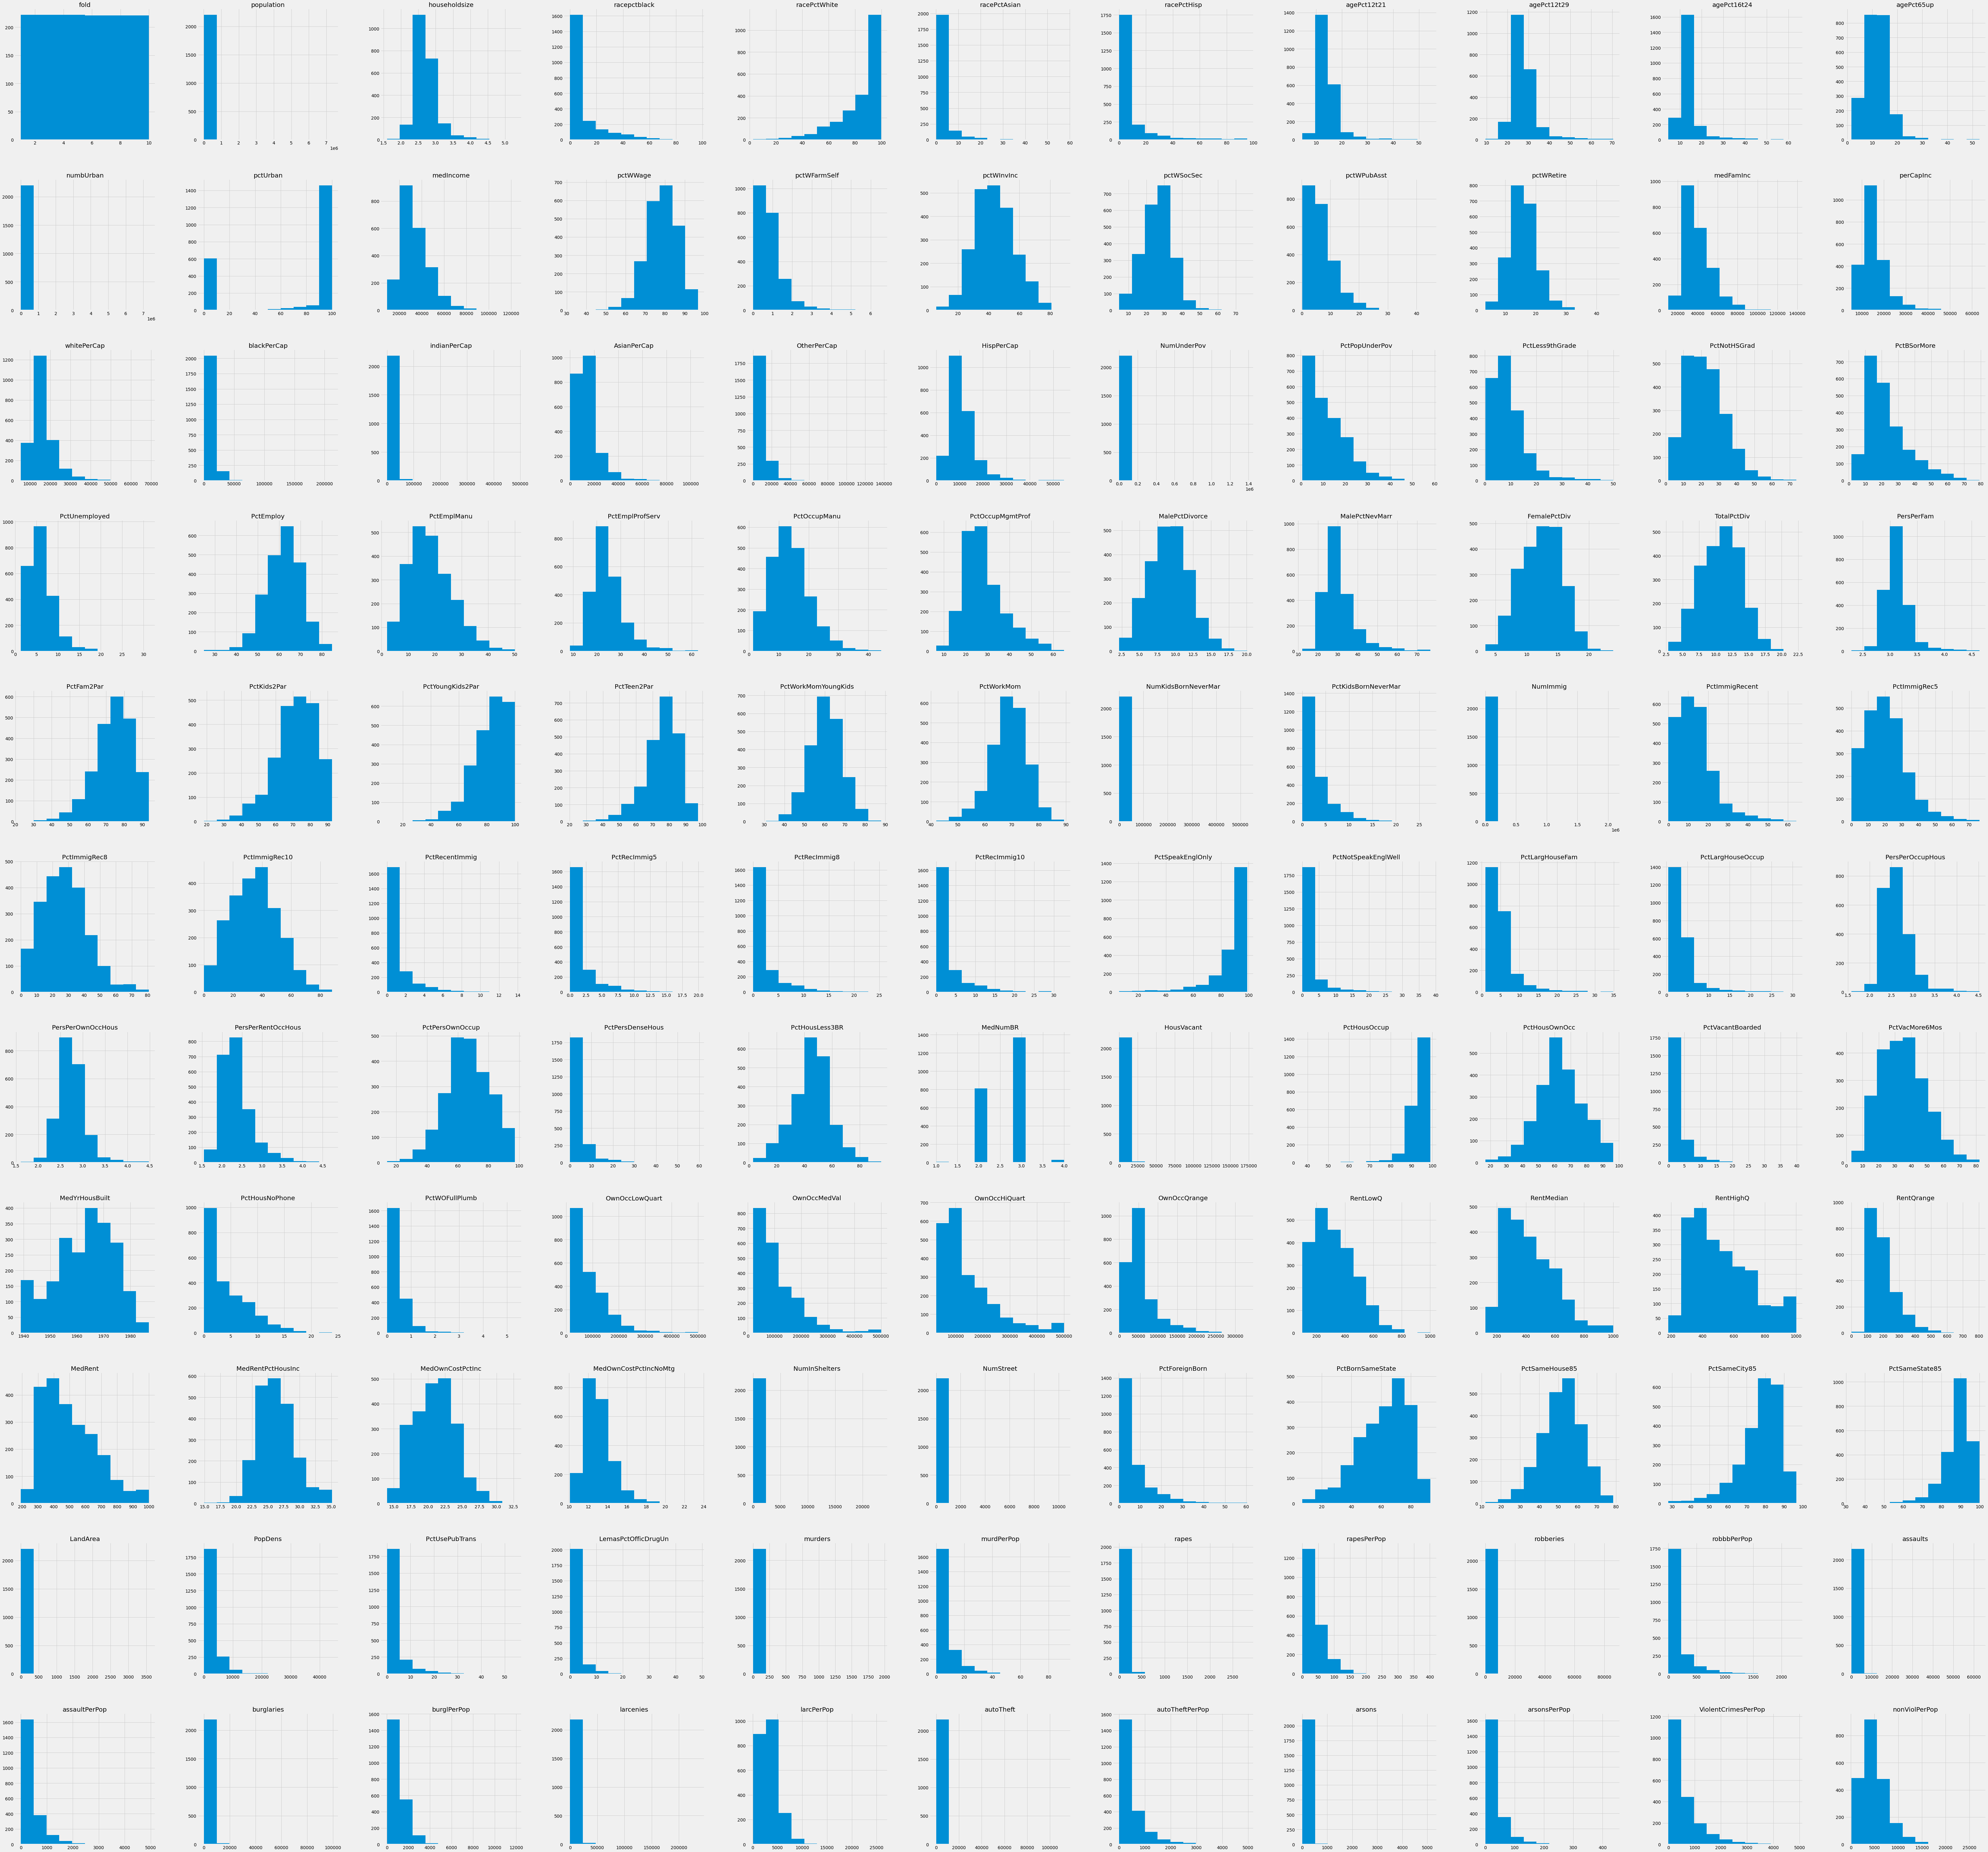

In [102]:
df1.hist(figsize=[100, 100])
plt.show()

In [103]:
# As the data has outliers we will fill NAN field with median Not mean
for col in df1.columns:
  if df1[col].dtypes != 'O' :
    df1[col].fillna(df1[col].median(), inplace=True)

In [104]:
# From the graph you can see that the data is skewed, and you can check that with this table 
df1.describe()


fold    population  householdsize  racepctblack  racePctWhite  \
count  2215.000000  2.215000e+03    2215.000000   2215.000000   2215.000000   
mean      5.494357  5.311798e+04       2.707327      9.335102     83.979819   
std       2.872924  2.046203e+05       0.334120     14.247156     16.419080   
min       1.000000  1.000500e+04       1.600000      0.000000      2.680000   
25%       3.000000  1.436600e+04       2.500000      0.860000     76.320000   
50%       5.000000  2.279200e+04       2.660000      2.870000     90.350000   
75%       8.000000  4.302400e+04       2.850000     11.145000     96.225000   
max      10.000000  7.322564e+06       5.280000     96.670000     99.630000   

       racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  \
count   2215.000000  2215.000000  2215.000000  2215.000000  2215.000000   
mean       2.670203     7.950176    14.445837    27.644840    13.975142   
std        4.473843    14.589832     4.518623     6.181517     5.970747   
min        0.030000     0.120000     4.580000     9.380000     4.640000   
25%        0.620000     0.930000    12.250000    24.415000    11.320000   
50%        1.230000     2.180000    13.620000    26.780000    12.540000   
75%        2.670000     7.810000    15.360000    29.205000    14.345000   
max       57.460000    95.290000    54.400000    70.510000    63.620000   

        agePct65up     numbUrban     pctUrban      medIncome     pctWWage  \
count  2215.000000  2.215000e+03  2215.000000    2215.000000  2215.000000   
mean     11.836393  4.773472e+04    70.465309   33984.696163    78.312758   
std       4.777565  2.056067e+05    44.080275   13424.680011     7.950672   
min       1.660000  0.000000e+00     0.000000    8866.000000    31.680000   
25%       8.750000  0.000000e+00     0.000000   23817.000000    73.400000   
50%      11.730000  1.804100e+04   100.000000   31441.000000    78.610000   
75%      14.415000  4.191800e+04   100.000000   41480.500000    84.030000   
max      52.770000  7.322564e+06   100.000000  123625.000000    96.760000   

       pctWFarmSelf   pctWInvInc   pctWSocSec  pctWPubAsst   pctWRetire  \
count   2215.000000  2215.000000  2215.000000  2215.000000  2215.000000   
mean       0.881842    43.750935    26.409418     6.801445    15.969002   
std        0.689006    12.787925     8.295604     4.700335     4.622553   
min        0.000000     5.810000     4.810000     0.180000     3.460000   
25%        0.460000    34.680000    20.770000     3.270000    12.875000   
50%        0.690000    42.880000    26.590000     5.610000    15.650000   
75%        1.100000    52.740000    31.715000     9.105000    18.755000   
max        6.530000    89.040000    76.390000    44.820000    45.510000   

           medFamInc     perCapInc   whitePerCap    blackPerCap  \
count    2215.000000   2215.000000   2215.000000    2215.000000   
mean    39857.055079  15603.524605  16567.698420   11541.749436   
std     14251.206032   6281.558523   6346.840251    9232.102062   
min     10447.000000   5237.000000   5472.000000       0.000000   
25%     29538.000000  11602.500000  12610.500000    6742.500000   
50%     36678.000000  14101.000000  15073.000000    9777.000000   
75%     46999.000000  17795.000000  18609.500000   14526.000000   
max    139008.000000  63302.000000  68850.000000  212120.000000   

        indianPerCap    AsianPerCap    OtherPerCap    HispPerCap  \
count    2215.000000    2215.000000    2215.000000   2215.000000   
mean    12229.191422   14227.989616    9442.197743  11018.998194   
std     14853.836177    9881.266395    7924.721423   5884.063446   
min         0.000000       0.000000       0.000000      0.000000   
25%      6345.000000    8285.500000    5528.500000   7274.000000   
50%      9895.000000   12250.000000    8186.000000   9721.000000   
75%     14757.500000   17327.500000   11525.000000  13418.000000   
max    480000.000000  106165.000000  137000.000000  54648.000000   

        NumUnderPov  PctPopUnderPov  Pc

In [105]:
# We need to normalise our data to prevent the skewing in our data 


In [106]:
df1['state'].value_counts()

CA    279
NJ    211
TX    162
MA    123
OH    111
MI    108
PA    101
FL     90
CT     71
MN     66
WI     60
IN     48
NC     46
NY     46
AL     43
MO     42
WA     40
IL     40
GA     37
OK     36
TN     35
VA     33
OR     31
SC     28
RI     26
KY     26
CO     25
AR     25
UT     24
LA     22
NH     21
IA     20
MS     20
AZ     20
ME     17
WV     14
MD     12
NM     10
SD      9
ND      8
WY      7
ID      7
NV      5
VT      4
AK      3
KS      1
DE      1
DC      1
Name: state, dtype: int64

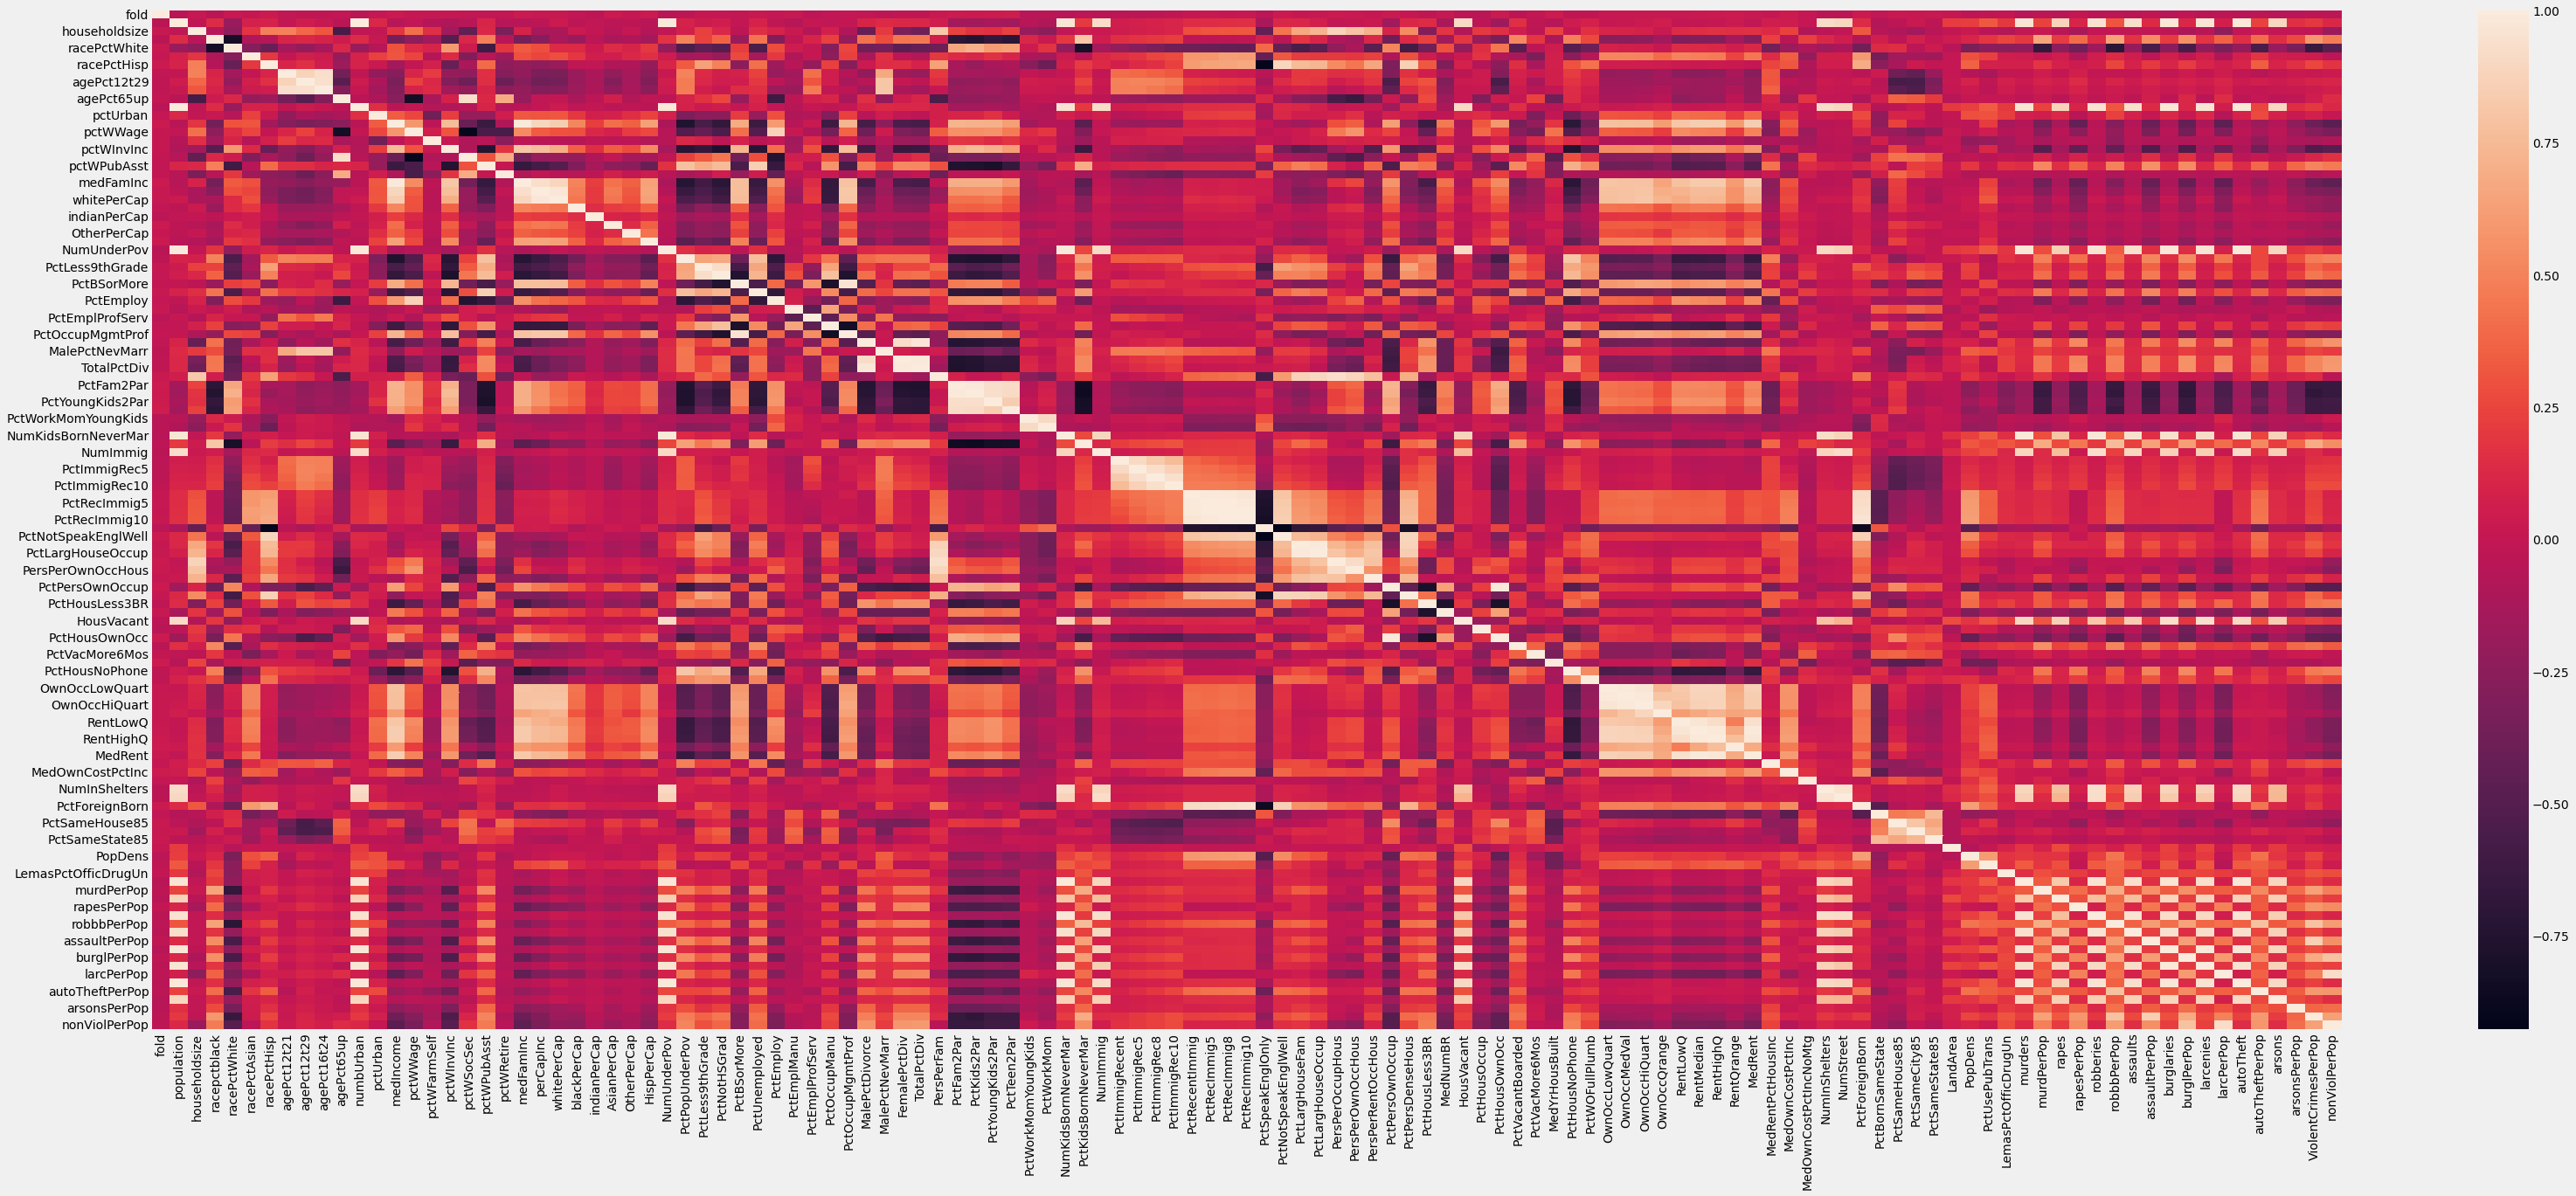

In [107]:
f, ax = plt.subplots(figsize=(50, 20))
ax = sns.heatmap(df1.drop(['Êcommunityname','state'],axis=1).corr())

In [108]:
df1['murders'].value_counts()


0       1026
1        391
2        212
3        130
4         83
5         48
8         38
6         37
7         27
9         24
10        18
12        14
19        11
22         9
13         8
11         7
14         7
17         6
16         6
18         5
33         5
15         5
20         4
27         4
45         3
23         3
47         2
31         2
74         2
68         2
37         2
42         2
122        2
105        2
39         2
62         2
133        2
30         2
76         2
58         2
21         2
48         2
28         2
80         2
157        1
24         1
26         1
50         1
91         1
127        1
154        1
96         1
203        1
125        1
454        1
32         1
121        1
60         1
158        1
78         1
220        1
845        1
87         1
34         1
167        1
83         1
198        1
353        1
29         1
1946       1
439        1
44         1
1076       1
43         1
317        1
52         1
126        1

# Create the Target Column from all crimes types in the data 

In [109]:
# murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons
df1['crimes'] = df1['murders']+df1['rapes']+df1['robberies']+df1['assaults']+df1['burglaries']+df1['larcenies']+df1['autoTheft']+df1['arsons']

In [110]:
df1.drop(columns=['murders','rapes','robberies','assaults','burglaries','larcenies','autoTheft','arsons'], inplace=True, axis=1)

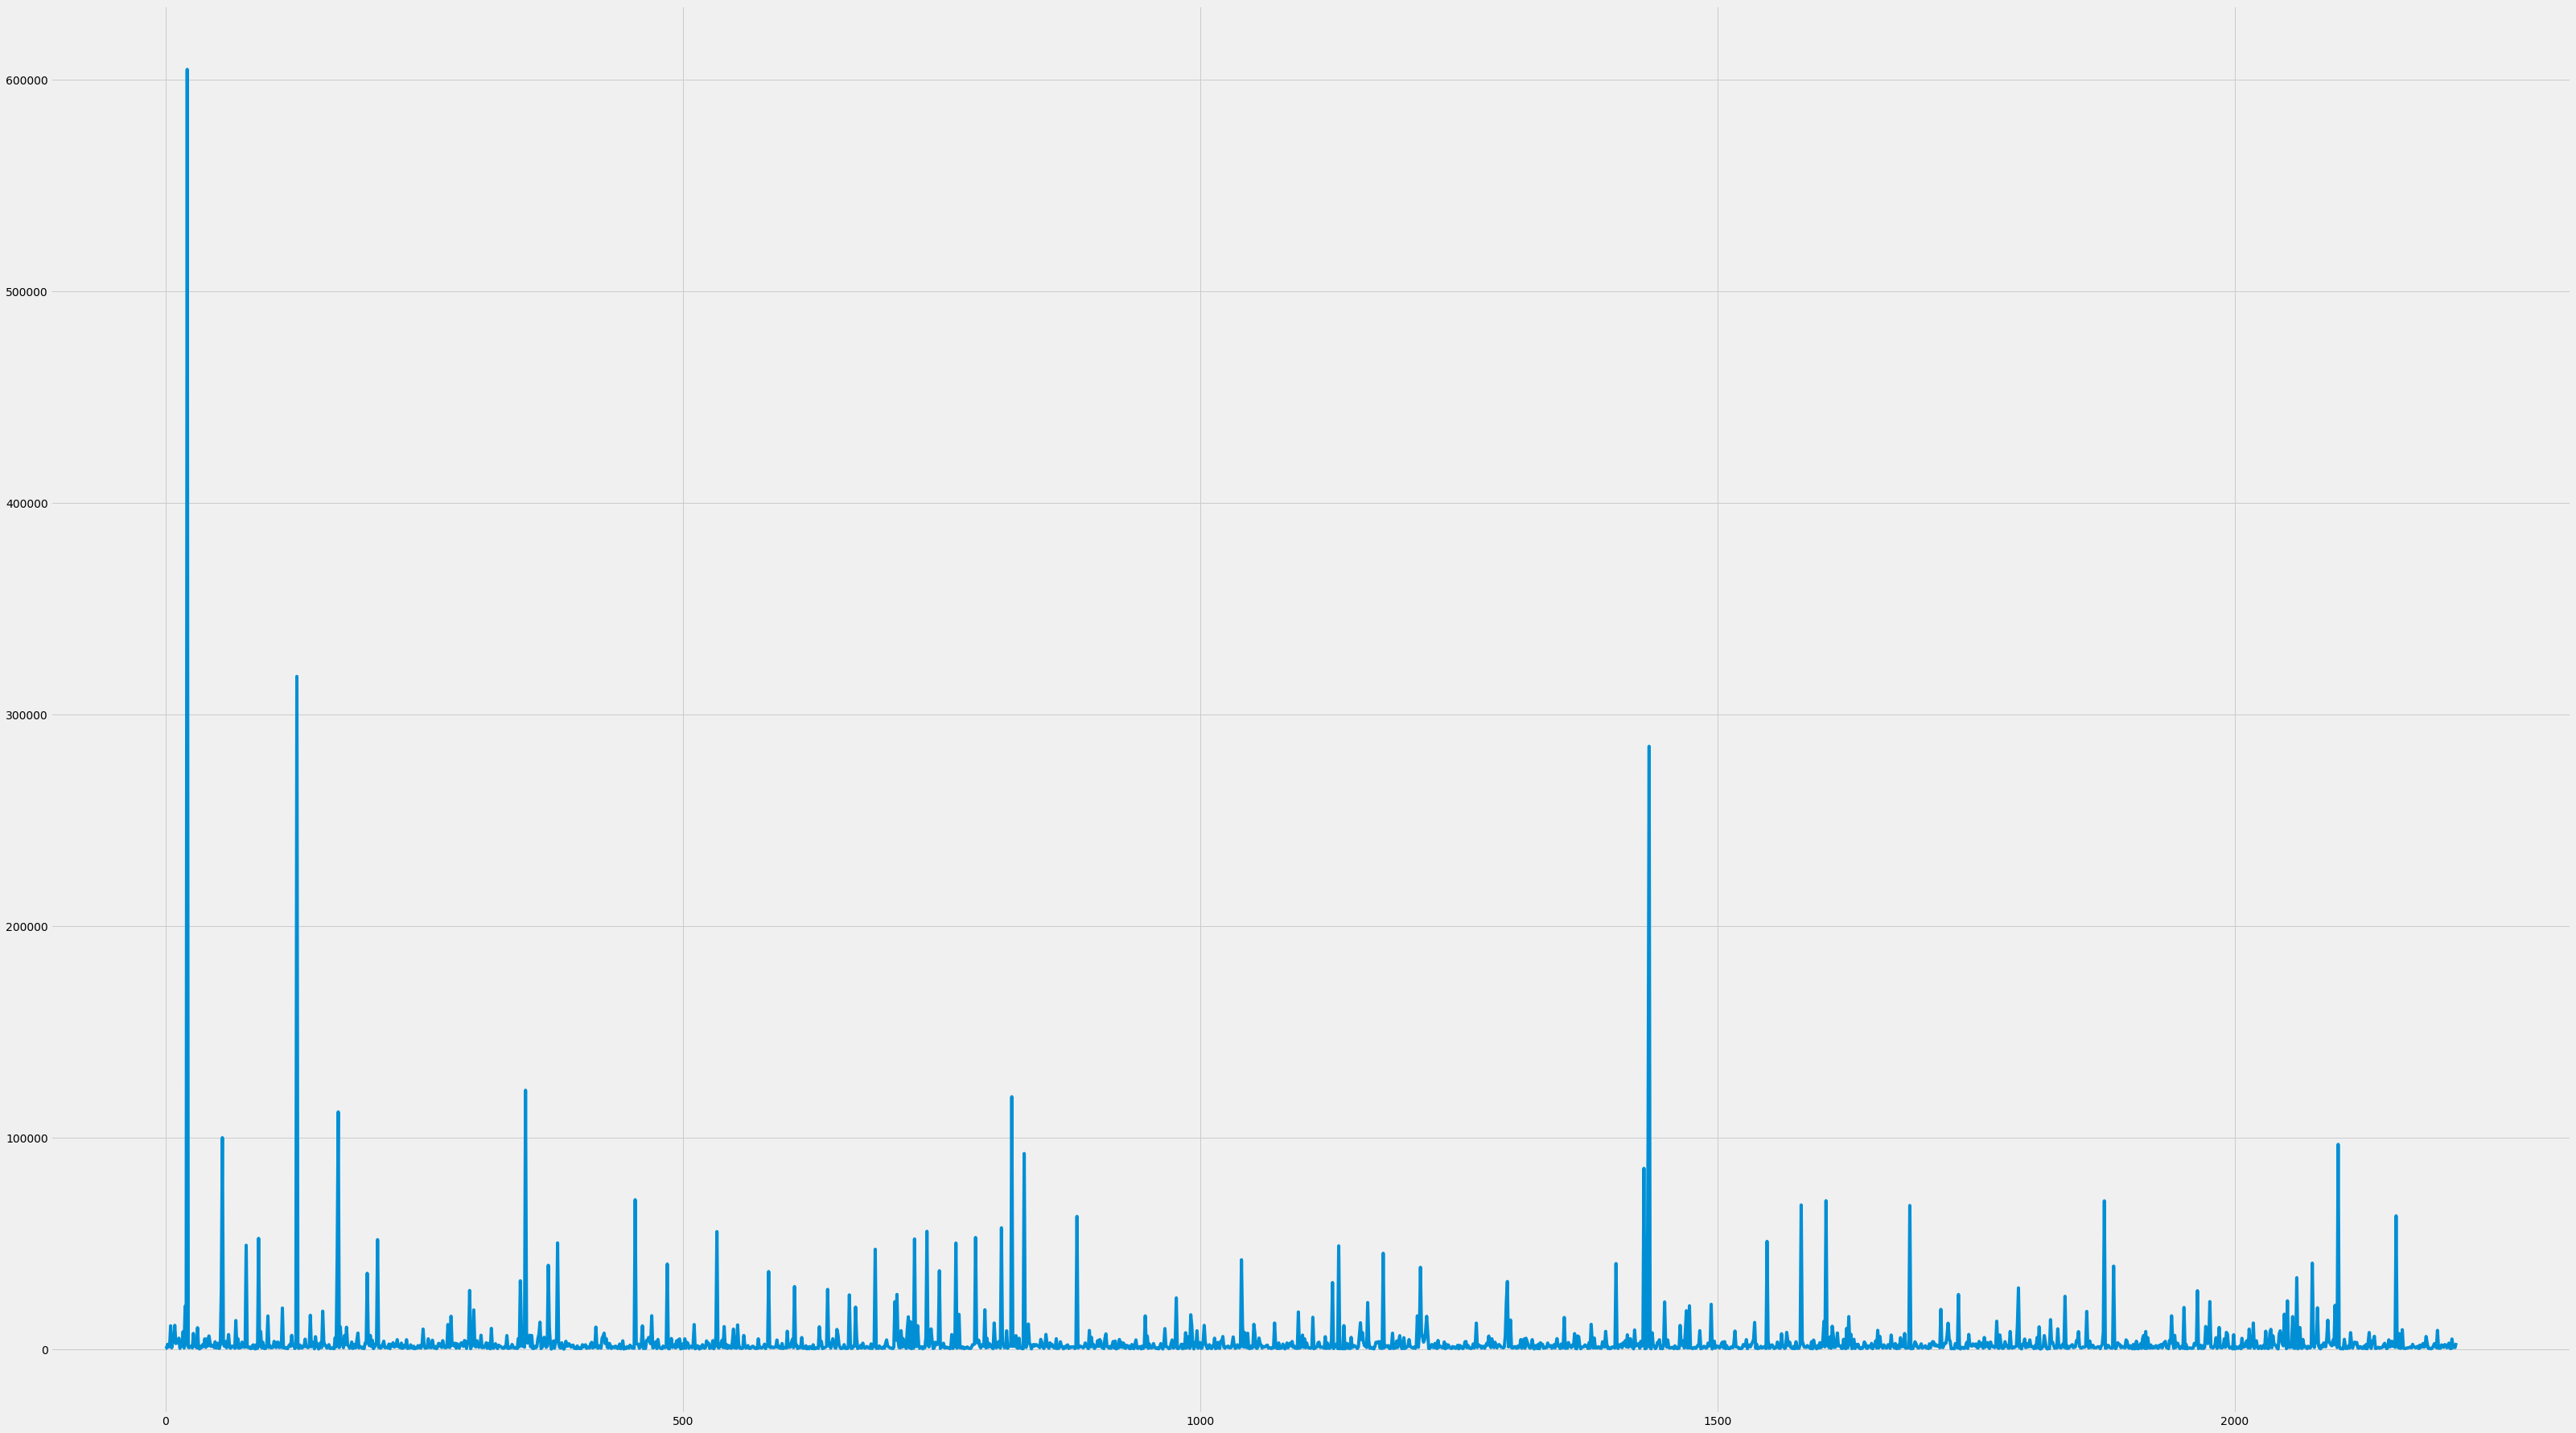

In [111]:
df1['crimes'].plot(figsize=(50,30))
plt.show()

In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 116 entries, Êcommunityname to crimes
dtypes: float64(86), int64(28), object(2)
memory usage: 2.0+ MB


# Normalization

In [113]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df1.drop(columns = ['Êcommunityname','state','crimes']))
df_scaled = pd.DataFrame(df_scaled , columns= df1.columns.difference(['Êcommunityname','state','crimes']))
df_scaled.insert(0, "Êcommunityname", df1['Êcommunityname'])
df_scaled.insert(1, "state", df1['state'])
df_scaled.sample(20)

Êcommunityname state  AsianPerCap  FemalePctDiv  HispPerCap  \
1520      Wheelingvillage    IL     0.666667      0.002722    0.217391   
392    UpperArlingtoncity    OH     0.111111      0.003299    0.230978   
139       Parkersburgcity    WV     0.000000      0.003262    0.201087   
2041           Cantontown    MA     1.000000      0.001166    0.328804   
776           Radfordcity    VA     0.333333      0.000812    0.396739   
567       AppleValleycity    MN     0.222222      0.003363    0.407609   
2055           Nashuacity    NH     1.000000      0.009526    0.263587   
1740       Northglenncity    CO     0.777778      0.002351    0.317935   
1601          Crowleycity    LA     0.777778      0.000544    0.309783   
1355         Brooklyncity    OH     0.666667      0.000233    0.182065   
2111     SafetyHarborcity    FL     1.000000      0.000700    0.260870   
116           Sturgiscity    MI     0.000000      0.000017    0.260870   
799         Kerrvillecity    TX     0.333333      0.001009    0.228261   
193         Pittsburgcity    CA     0.000000      0.005136    0.391304   
1988           Warsawcity    IN     0.888889      0.000132    0.274457   
179           Douglascity    AZ     0.000000      0.000385    0.434783   
1815            Alvincity    TX     0.888889      0.001260    0.315217   
2056       Greensborocity    NC     1.000000      0.023728    0.230978   
2156          Seattlecity    WA     1.000000      0.069231    0.157609   
2114  Springfieldtownship    NJ     1.000000      0.000467    0.195652   

      HousVacant  LandArea  LemasPctOfficDrugUn  MalePctDivorce  \
1520    0.017379  0.901908             0.079575        0.086792   
392     0.002586  0.975761             0.039004        0.006515   
139     0.017586  0.980093             0.004701        0.001786   
2041    0.013241  0.974214             0.020547        0.007250   
776     0.062067  0.919856             0.029253        0.010297   
567     0.009413  0.969366             0.032910        0.009352   
2055    0.016758  0.953791             0.033084        0.030472   
1740    0.016965  0.907684             0.034825        0.151939   
1601    0.317368  0.682001             0.004876        0.003152   
1355    0.009413  0.975451             0.017587        0.019334   
2111    0.053998  0.933677             0.016368        0.029106   
116     0.007758  0.982362             0.010273        0.012714   
799     0.042412  0.855389             0.009751        0.229484   
193     0.181856  0.576792             0.211562        0.248082   
1988    0.011069  0.969778             0.013756        0.028580   
179     0.011069  0.709438             0.007662        0.875801   
1815    0.018930  0.847653             0.008184        0.227383   
2056    0.351195  0.631253             0.024378        0.008826   
2156    0.104065  0.749252             0.204597        0.036041   
2114    0.035688  0.942754             0.036566        0.020385   

      MalePctNevMarr  MedNumBR  MedOwnCostPctInc  MedOwnCostPctIncNoMtg  \
1520        0.101566  0.311140          0.102916               0.117003   
392         0.128462  0.142156          0.063920               0.293289   
139         0.158370  0.234418          0.116989               0.308159   
2041        0.175030  0.278096          0.146660               0.211505   
776         0.747892  0.789629          0.762631               0.123459   
567         0.222601  0.284639          0.113089               0.012326   
2055        0.151345  0.312940          0.136826               0.146351   
1740        0.207748  0.309014          0.152933               0.091372   
1601        0.210357  0.269753          0.130553               0.222266   
1355        0.121437  0.221332          0.110207               0.384465   
2111        0.146728  0.190905          0.082740               0.250245   
116         0.181052  0.278423          0.123262               0.244179   
799         0.146929  0.185997          0.102916               0.466641  

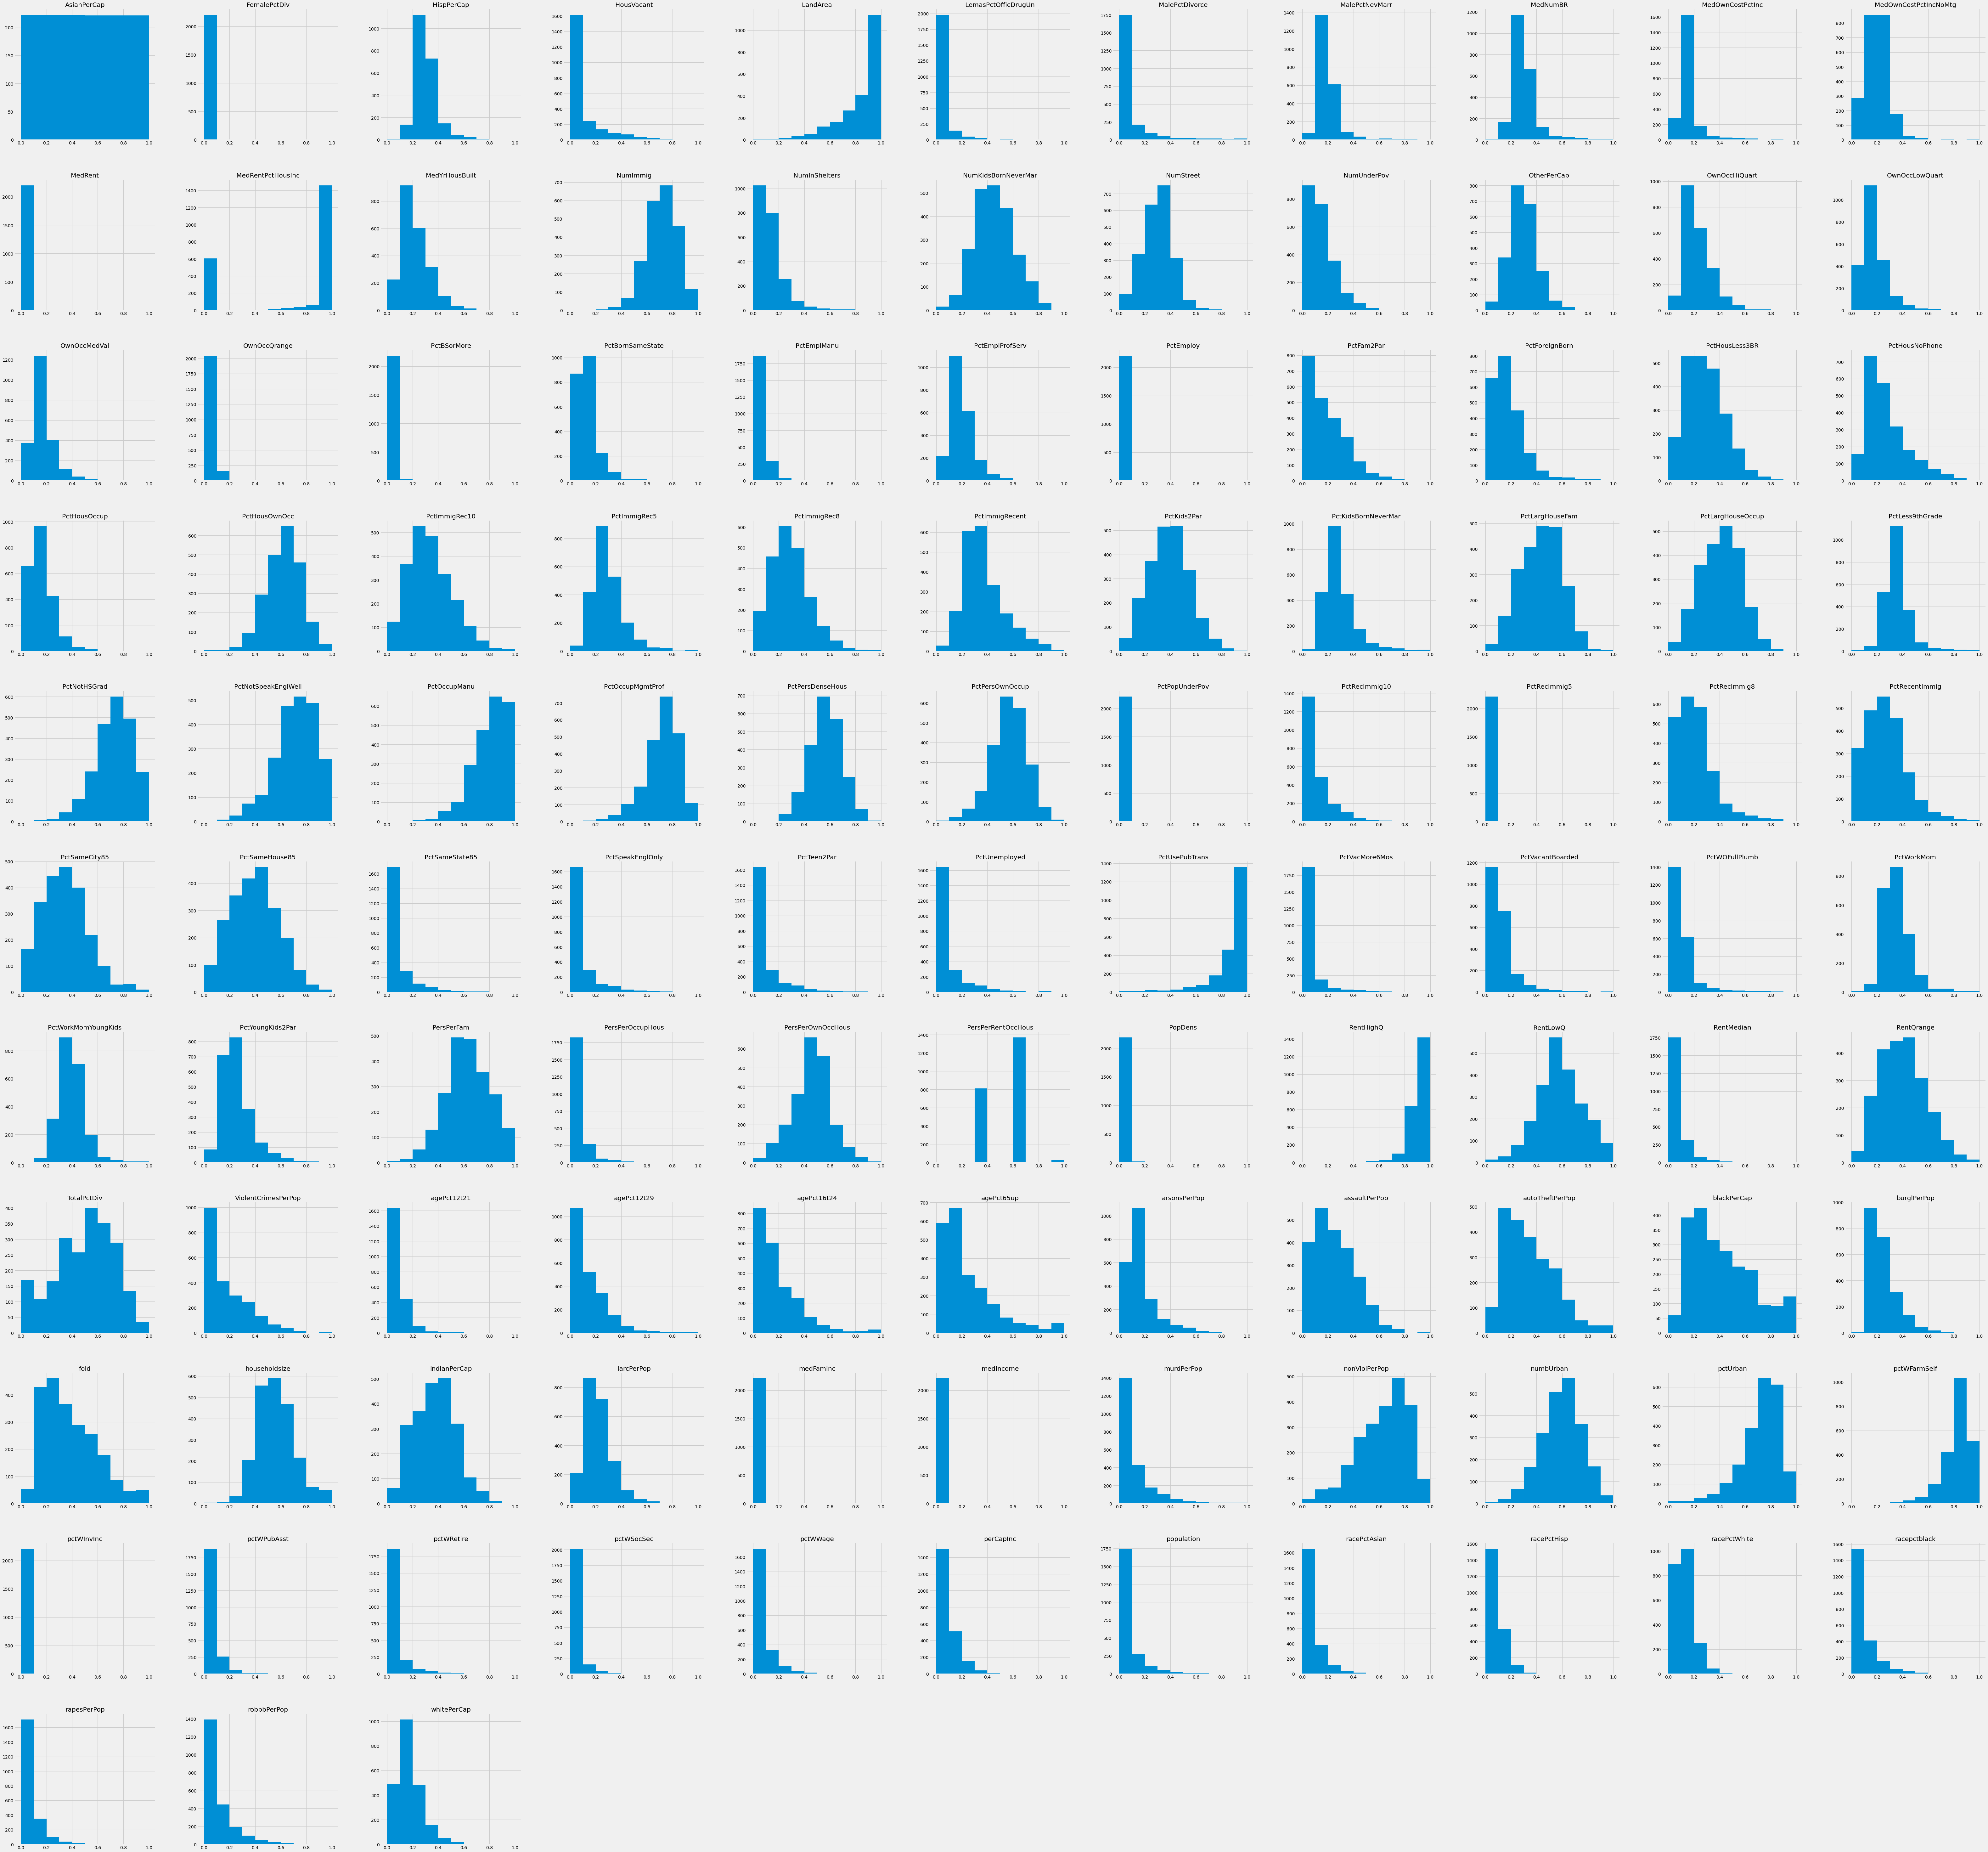

In [114]:
df_scaled.hist(figsize=[100, 100])
plt.show()

# Label Encoding

In [115]:
le1 = LabelEncoder()
le2 = LabelEncoder()
Ecommunityname_encoded = le1.fit_transform(df_scaled['Êcommunityname'])
state_encoded = le2.fit_transform(df_scaled.state) 


In [116]:
le1.classes_

array(['Aberdeencity', 'Aberdeentown', 'Aberdeentownship', ...,
       'Yucaipacity', 'Yukoncity', 'Zanesvillecity'], dtype=object)

In [117]:
le2.classes_

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'NC', 'ND', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'WY'], dtype=object)

In [118]:
Ecommunityname_encoded

array([ 149, 1034, 1780, ..., 2015,  123, 1929])

In [119]:
state_encoded

array([28, 35, 34, ...,  4, 40,  4])

In [120]:
df_scaled

Êcommunityname state  AsianPerCap  FemalePctDiv  HispPerCap  \
0     BerkeleyHeightstownship    NJ          0.0      0.000270    0.407609   
1              Marpletownship    PA          0.0      0.001794    0.331522   
2                  Tigardcity    OR          0.0      0.002645    0.225543   
3            Gloversvillecity    NY          0.0      0.000910    0.217391   
4                 Bemidjicity    MN          0.0      0.000170    0.315217   
...                       ...   ...          ...           ...         ...   
2210               Mercedcity    CA          1.0      0.006319    0.399457   
2211            Pinevillecity    LA          1.0      0.000307    0.293478   
2212              Yucaipacity    CA          1.0      0.003121    0.233696   
2213             Beevillecity    TX          1.0      0.000484    0.350543   
2214       WestSacramentocity    CA          1.0      0.002584    0.274457   

      HousVacant  LandArea  LemasPctOfficDrugUn  MalePctDivorce  \
0       0.014172  0.919030             0.112659        0.018493   
1       0.008276  0.958123             0.059377        0.007670   
2       0.007655  0.945333             0.059203        0.023432   
3       0.017586  0.976483             0.008184        0.006094   
4       0.005483  0.892006             0.019850        0.004203   
...          ...       ...                  ...             ...   
2210    0.071067  0.608561             0.264670        0.312493   
2211    0.219096  0.762971             0.025945        0.012294   
2212    0.005379  0.927695             0.016542        0.114322   
2213    0.034861  0.693450             0.015149        0.651361   
2214    0.024723  0.707478             0.157757        0.255438   

      MalePctNevMarr  MedNumBR  MedOwnCostPctInc  MedOwnCostPctIncNoMtg  \
0           0.158370  0.197284          0.106646               0.189200   
1           0.129065  0.194994          0.099017               0.303659   
2           0.136090  0.269917          0.108003               0.168656   
3           0.159976  0.258793          0.128009               0.311289   
4           0.399037  0.509570          0.407765               0.215026   
...              ...       ...               ...                    ...   
2210        0.218386  0.339931          0.164463               0.125611   
2211        0.256523  0.357435          0.209054               0.213461   
2212        0.145122  0.189432          0.082909               0.373117   
2213        0.252509  0.337478          0.171075               0.171395   
2214        0.168808  0.258956          0.118515               0.204657   

       MedRent  MedRentPctHousInc  MedYrHousBuilt  NumImmig  NumInShelters  \
0     0.001636             1.0000        0.577349  0.884450       0.237366   
1     0.003158             1.0000        0.340287  0.726951       0.169985   
2     0.004007             1.0000        0.233559  0.773202       0.176110   
3     0.000000             0.0000        0.102075  0.560387       0.036753   
4     0.000000             0.0000        0.074277  0.578519       0.084227   
...        ...                ...             ...       ...            ...   
2210  0.007677             1.0000        0.138211  0.666411       0.171516   
2211  0.001673             1.0000        0.099818  0.666564       0.071975   
2212  0.004483             1.0000        0.159604  0.431930       0.078101   
2213  0.000000             0.0000        0.096141  0.614474       0.260337   
2214  0.003914             0.9919        0.125663  0.571758       0.183767   

      NumKidsBornNeverMar  NumStreet  NumUnderPov  OtherPerCap  OwnOccHiQuart  \
0                0.773639   0.262783     0.019041     0.355054       0.537776   
1                0.700469   0.428751     0.057572     0.461118       0.349064   
2                0.599784   0.243643     0.061828     0.263971       0.246303   
3                0.398174   0.484353     0.258289     0.353627       0.124875   
4                0.444671   0.

In [121]:
df_encoded = df_scaled.copy()

In [122]:
df_encoded['Êcommunityname'] = Ecommunityname_encoded

In [123]:
df_encoded['state'] = state_encoded

In [124]:
df_encoded.describe()

Êcommunityname        state  AsianPerCap  FemalePctDiv   HispPerCap  \
count     2215.000000  2215.000000  2215.000000   2215.000000  2215.000000   
mean       996.850564    22.765688     0.499373      0.005896     0.300904   
std        580.979598    13.442833     0.319214      0.027982     0.090793   
min          0.000000     0.000000     0.000000      0.000000     0.000000   
25%        497.500000     9.000000     0.222222      0.000596     0.244565   
50%        988.000000    23.000000     0.444444      0.001749     0.288043   
75%       1498.500000    34.000000     0.777778      0.004515     0.339674   
max       2017.000000    47.000000     1.000000      1.000000     1.000000   

        HousVacant     LandArea  LemasPctOfficDrugUn  MalePctDivorce  \
count  2215.000000  2215.000000          2215.000000     2215.000000   
mean      0.096567     0.838575             0.045973        0.082276   
std       0.147379     0.169356             0.077901        0.153303   
min       0.000000     0.000000             0.000000        0.000000   
25%       0.008896     0.759567             0.010273        0.008511   
50%       0.029689     0.904281             0.020895        0.021645   
75%       0.115289     0.964879             0.045969        0.080803   
max       1.000000     1.000000             1.000000        1.000000   

       MalePctNevMarr     MedNumBR  MedOwnCostPctInc  MedOwnCostPctIncNoMtg  \
count     2215.000000  2215.000000       2215.000000            2215.000000   
mean         0.198030     0.298787          0.158276               0.199108   
std          0.090699     0.101121          0.101233               0.093476   
min          0.000000     0.000000          0.000000               0.000000   
25%          0.153954     0.245951          0.113259               0.138720   
50%          0.181453     0.284639          0.133944               0.197026   
75%          0.216379     0.324309          0.164547               0.249560   
max          1.000000     1.000000          1.000000               1.000000   

           MedRent  MedRentPctHousInc  MedYrHousBuilt     NumImmig  \
count  2215.000000        2215.000000     2215.000000  2215.000000   
mean      0.006519           0.704653        0.218882     0.716545   
std       0.028079           0.440803        0.116982     0.122168   
min       0.000000           0.000000        0.000000     0.000000   
25%       0.000000           0.000000        0.130282     0.641057   
50%       0.002464           1.000000        0.196717     0.721112   
75%       0.005724           1.000000        0.284200     0.804395   
max       1.000000           1.000000        1.000000     1.000000   

       NumInShelters  NumKidsBornNeverMar    NumStreet  NumUnderPov  \
count    2215.000000          2215.000000  2215.000000  2215.000000   
mean        0.135045             0.455856     0.301752     0.148330   
std         0.105514             0.153646     0.115893     0.105294   
min         0.000000             0.000000     0.000000     0.000000   
25%         0.070444             0.346870     0.222967     0.069220   
50%         0.105666             0.445392     0.304275     0.121640   
75%         0.168453             0.563859     0.375873     0.199933   
max         1.000000             1.000000     1.000000     1.000000   

       OtherPerCap  OwnOccHiQuart  OwnOccLowQuart  OwnOccMedVal  OwnOccQrange  \
count  2215.000000    2215.000000     2215.000000   2215.000000   2215.000000   
mean      0.297479       0.228763        0.178533      0.175072      0.054411   
std       0.109930       0.110852        0.108181      0.100143      0.043523   
min       0.000000       0.000000        0.000000      0.000000      0.000000   
25%       0.223900       0.148498        0.109627      0.112634      0.031786   
50%       0.289893       0.204035        0.152657      0.151488      0.046092   
75%       0.363734       0.284316        0.216275      0.207288      0.068480   
max       1.000000      

# **MODELING**

In [125]:
X_train, X_test, y_train, y_test= train_test_split(df_encoded,df1.crimes,test_size=0.2,random_state=42,shuffle=True)

In [126]:
import statsmodels.api as sm
# Add a constant
x_train_lm = sm.add_constant(X_train)
# Create a first fitted model
lr = sm.OLS(y_train,x_train_lm).fit()

In [127]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crimes   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     953.3
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:33:07   Log-Likelihood:                -16344.
No. Observations:                1772   AIC:                         3.292e+04
Df Residuals:                    1658   BIC:                         3.354e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.556e+04   6080.608     -2.559      0.011   -2.75e+04   -3630.815
Êcommunityname           -0.0577      0.108     -0.536      0.592      -0.269       0.154
state                    -4.5366      6.213     -0.730      0.465     -16.724       7.650
AsianPerCap            -173.1935    197.985     -0.875      0.382    -561.521     215.134
FemalePctDiv            4.37e+04    1.2e+05      0.363      0.717   -1.92e+05     2.8e+05
HispPerCap              374.7802   3218.926      0.116      0.907   -5938.807    6688.367
HousVacant            -2331.3721   2478.635     -0.941      0.347   -7192.956    2530.212
LandArea               4820.5809   2346.613      2.054      0.040     217.945    9423.217
LemasPctOfficDrugUn    2256.7139   2340.296      0.964      0.335   -2333.532    6846.960
MalePctDivorce         -173.3154   2035.366     -0.085      0.932   -4165.473    3818.842
MalePctNevMarr        -2048.1649   4964.112     -0.413      0.680   -1.18e+04    7688.424
MedNumBR              -1088.6824   5926.070     -0.184      0.854   -1.27e+04    1.05e+04
MedOwnCostPctInc       5796.0556   8492.248      0.683      0.495   -1.09e+04    2.25e+04
MedOwnCostPctIncNoMtg  4233.5788   4143.506      1.022      0.307   -3893.477    1.24e+04
MedRent                3.026e+05   1.19e+05      2.544      0.011    6.93e+04    5.36e+05
MedRentPctHousInc     -1202.3542    382.271     -3.145      0.002   -1952.140    -452.569
MedYrHousBuilt         5549.9398   6819.110      0.814      0.416   -7825.033    1.89e+04
NumImmig               2961.4211   2931.205      1.010      0.312   -2787.832    8710.675
NumInShelters          -436.5589    798.898     -0.546      0.585   -2003.515    1130.397
NumKidsBornNeverMar   -2357.0209   1685.104     -1.399      0.162   -5662.177     948.135
NumStreet              -375.6762   3276.416     -0.115      0.909   -6802.025    6050.672
NumUnderPov           -1396.9669   2043.491     -0.684      0.494   -5405.062    2611.128
OtherPerCap            1271.9727   1216.575      1.046      0.296   -1114.212    3658.157
OwnOccHiQuart         -9926.1212   6918.048     -1.435      0.152   -2.35e+04    3642.910
OwnOccLowQuart        -3.997e+04   7245.496     -5.517      0.000   -5.42e+04   -2.58e+04
OwnOccMedVal           4.591e+04   6191.741      7.415      0.000    3.38e+04    5.81e+04
OwnOccQrange           1141.9730   1669.543      0.684      0.494   -2132.661    4416.607
PctBSorMore             202.0769   1900.201      0.106      0.915   -3524.969    3929.123
PctBornSameState        600.8387    776.084      0.774      0.439    -921.368    2123.046
PctEmplManu            -272.8815   1285.447     -0.212      0.832   -2794.152    2248.389
PctEmplProfServ         925.5857    824.259      1.123      0.262    -691.113    2542.285
PctEmploy              

# Filter based on P-Value

In [304]:
feature_cols_23 = df_encoded.columns[lr.pvalues.drop('const') < 1.182921e-01]
len(feature_cols_23)

23

In [301]:
feature_arr_23 = np.array(feature_cols_23)
feature_arr_23

array(['LandArea', 'MedRent', 'MedRentPctHousInc', 'OwnOccLowQuart',
       'OwnOccMedVal', 'PctEmploy', 'PctForeignBorn', 'PctHousLess3BR',
       'PctHousNoPhone', 'PctRecImmig5', 'PctSpeakEnglOnly',
       'PctTeen2Par', 'PctVacMore6Mos', 'PctVacantBoarded',
       'PctWOFullPlumb', 'RentMedian', 'medFamInc', 'medIncome',
       'pctWSocSec', 'pctWWage', 'population', 'racePctAsian',
       'robbbPerPop'], dtype=object)

In [243]:
feature_cols_68 = df_encoded.columns[lr.pvalues.drop('const') < 4.300058e-01]
len(feature_cols_68)

68

In [244]:
# You can check
_23_features = lr.pvalues.drop('const').sort_values(ascending=True)[:23]
_23_features

PctEmploy            2.901297e-35
population           2.568725e-28
OwnOccMedVal         1.935964e-13
OwnOccLowQuart       4.004278e-08
medIncome            2.862487e-07
racePctAsian         9.240793e-06
PctHousLess3BR       1.513404e-03
MedRentPctHousInc    1.688677e-03
PctRecImmig5         2.738748e-03
PctForeignBorn       4.309291e-03
PctVacMore6Mos       7.384973e-03
MedRent              1.104263e-02
PctWOFullPlumb       1.331375e-02
PctVacantBoarded     2.384755e-02
LandArea             4.010583e-02
RentMedian           4.438379e-02
robbbPerPop          5.698119e-02
PctHousNoPhone       6.134307e-02
PctTeen2Par          7.691075e-02
PctSpeakEnglOnly     8.314212e-02
medFamInc            8.823672e-02
pctWWage             1.107282e-01
pctWSocSec           1.182921e-01
dtype: float64

In [245]:
# You can check 
_68_features =lr.pvalues.drop('const').sort_values(ascending=True)[:68]
_68_features

PctEmploy                2.901297e-35
population               2.568725e-28
OwnOccMedVal             1.935964e-13
OwnOccLowQuart           4.004278e-08
medIncome                2.862487e-07
racePctAsian             9.240793e-06
PctHousLess3BR           1.513404e-03
MedRentPctHousInc        1.688677e-03
PctRecImmig5             2.738748e-03
PctForeignBorn           4.309291e-03
PctVacMore6Mos           7.384973e-03
MedRent                  1.104263e-02
PctWOFullPlumb           1.331375e-02
PctVacantBoarded         2.384755e-02
LandArea                 4.010583e-02
RentMedian               4.438379e-02
robbbPerPop              5.698119e-02
PctHousNoPhone           6.134307e-02
PctTeen2Par              7.691075e-02
PctSpeakEnglOnly         8.314212e-02
medFamInc                8.823672e-02
pctWWage                 1.107282e-01
pctWSocSec               1.182921e-01
PctFam2Par               1.233682e-01
PctRecImmig10            1.272007e-01
pctWPubAsst              1.287041e-01
OwnOccHiQuar

In [246]:
x_train_filtered_23 = X_train[feature_cols_23]
x_test_filtered_23 = X_test[feature_cols_23]

x_train_filtered_23

LandArea   MedRent  MedRentPctHousInc  OwnOccLowQuart  OwnOccMedVal  \
1728  0.963486  0.001825             0.9212        0.290829      0.269652   
59    0.815162  0.002984             1.0000        0.162576      0.172016   
71    0.836617  0.002890             1.0000        0.376406      0.363612   
479   0.936050  0.001479             1.0000        0.194334      0.171242   
1984  0.763693  0.005207             1.0000        0.117282      0.108792   
...        ...       ...                ...             ...           ...   
1638  0.661269  0.000000             0.0000        0.026677      0.049702   
1095  0.686230  0.036757             1.0000        0.108327      0.127173   
1130  0.934605  0.000000             0.0000        0.125050      0.114141   
1294  0.943373  0.002255             1.0000        0.145509      0.133011   
860   0.924910  0.001992             1.0000        0.243727      0.226356   

      PctEmploy  PctForeignBorn  PctHousLess3BR  PctHousNoPhone  PctRecImmig5  \
1728   0.000142        0.093580        0.173823        0.444101      0.000277   
59     0.001369        0.083920        0.162881        0.472727      0.000177   
71     0.000170        0.087945        0.146260        0.513088      0.001100   
479    0.000349        0.292413        0.401108        0.182592      0.001241   
1984   0.004448        0.623063        0.673684        0.138620      0.011046   
...         ...             ...             ...             ...           ...   
1638   0.000504        0.278527        0.524100        0.069375      0.000159   
1095   0.042650        0.254578        0.434211        0.201161      0.001933   
1130   0.002438        0.171866        0.346122        0.161702      0.000252   
1294   0.000950        0.118535        0.243213        0.139652      0.000132   
860    0.000188        0.095995        0.181717        0.338491      0.000284   

      PctSpeakEnglOnly  PctTeen2Par  PctVacMore6Mos  PctVacantBoarded  \
1728          0.014049     0.020916        0.015393          0.111177   
59            0.048169     0.037885        0.009131          0.087290   
71            0.078274     0.092344        0.039917          0.088469   
479           0.302057     0.304262        0.227759          0.076379   
1984          0.611139     0.663378        0.817636          0.181068   
...                ...          ...             ...               ...   
1638          0.039639     0.039463        0.031046          0.083161   
1095          0.027597     0.027230        0.014088          0.119729   
1130          0.003011     0.007103        0.020089          0.097611   
1294          0.006523     0.009471        0.024524          0.076674   
860           0.019568     0.019732        0.023219          0.136833   

      PctWOFullPlumb  RentMedian  medFamInc  medIncome  pctWSocSec  pctWWage  \
1728        0.103845    0.008273   0.000770   0.000000    0.000000  0.000000   
59          0.085442    0.023565   0.000000   0.000000    0.000000  0.096169   
71          0.091029    0.063424   0.000000   0.000000    0.000000  0.050609   
479         0.058166    0.000000   0.000000   0.000000    0.000000  0.000000   
1984        0.148538    0.098521   0.000000   0.000191    0.103220  0.029861   
...              ...         ...        ...        ...         ...       ...   
1638        0.066710    0.027827   0.000000   0.000000    0.000000  0.000000   
1095        0.085113    0.377789   0.034555   0.003159    0.010322  0.148974   
1130        0.074926    0.103535   0.000000   0.000000    0.000000  0.000000   
1294        0.075912    0.047631   0.000000   0.000000    0.000000  0.000000   
860         0.147552    0.068438   0.000000   0.000000    0.000000  0.073554   

      population  racePctAsian  robbbPerPop  
1728    0.002995      0.054958     0.059751  
59      0.027092      0.010660     0.025157  
71      0.024411      0.008403     0.023608  
479     0.012570      0.003846     0.009725  
1984    0.134617      0.051309     0.116

In [247]:
x_train_filtered_68 = X_train[feature_cols_68]
x_test_filtered_68 = X_test[feature_cols_68]

In [248]:
# Add a constant
x_train_lm_23 = sm.add_constant(x_train_filtered_23)
# Create a first fitted model
lr_23 = sm.OLS(y_train,x_train_lm_23).fit()

In [249]:
lr_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crimes   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     4462.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:21:56   Log-Likelihood:                -16433.
No. Observations:                1772   AIC:                         3.291e+04
Df Residuals:                    1748   BIC:                         3.304e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4514.1366    989.555     -4.562      0.000   -6454.972   -2573.301
LandArea           7866.8815    853.176      9.221      0.000    6193.528    9540.235
MedRent            3.804e+05   1.69e+04     22.472      0.000    3.47e+05    4.14e+05
MedRentPctHousInc -1437.3435    184.769     -7.779      0.000   -1799.736   -1074.951
OwnOccLowQuart     -4.49e+04   5097.855     -8.807      0.000   -5.49e+04   -3.49e+04
OwnOccMedVal       4.811e+04   5207.109      9.240      0.000    3.79e+04    5.83e+04
PctEmploy          2.507e+05   1.44e+04     17.422      0.000    2.22e+05    2.79e+05
PctForeignBorn     4904.6129   1984.341      2.472      0.014    1012.681    8796.545
PctHousLess3BR    -9813.5089   1912.033     -5.132      0.000   -1.36e+04   -6063.396
PctHousNoPhone    -2306.2018    892.088     -2.585      0.010   -4055.874    -556.530
PctRecImmig5       2.724e+04   8328.995      3.270      0.001    1.09e+04    4.36e+04
PctSpeakEnglOnly     28.3900   4858.684      0.006      0.995   -9501.054    9557.834
PctTeen2Par       -5828.6933   4790.443     -1.217      0.224   -1.52e+04    3566.908
PctVacMore6Mos     7220.2989   1834.397      3.936      0.000    3622.455    1.08e+04
PctVacantBoarded   5207.8307   5375.195      0.969      0.333   -5334.658    1.58e+04
PctWOFullPlumb    -6317.6567   5356.930     -1.179      0.238   -1.68e+04    4189.007
RentMedian        -3572.9810    950.760     -3.758      0.000   -5437.728   -1708.234
medFamInc          1.052e+04   9849.203      1.069      0.285   -8793.322    2.98e+04
medIncome         -6.112e+04   1.09e+04     -5.625      0.000   -8.24e+04   -3.98e+04
pctWSocSec        -1379.3392   1123.325     -1.228      0.220   -3582.541     823.863
pctWWage           1203.4256    972.973      1.237      0.216    -704.888    3111.739
population         1.839e+04   1365.636     13.466      0.000    1.57e+04    2.11e+04
racePctAsian       5814.4122   1359.035      4.278      0.000    3148.908    8479.917
robbbPerPop       -1398.0260   1333.765     -1.048      0.295   -4013.968    1217.916
==============================================================================
Omnibus:                      644.439   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           278177.136
Skew:                          -0.017   Prob(JB):                         0.00
Kurtosis:                      64.381   Cond. No.                         568.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
# Add a constant
x_train_lm_68 = sm.add_constant(x_train_filtered_68)
# Create a first fitted model
lr_68 = sm.OLS(y_train,x_train_lm_68).fit()

In [251]:
lr_68.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crimes   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1611.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:21:57   Log-Likelihood:                -16353.
No. Observations:                1772   AIC:                         3.284e+04
Df Residuals:                    1703   BIC:                         3.322e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.807e+04   3917.664     -4.612      0.000   -2.58e+04   -1.04e+04
AsianPerCap            -171.5392    192.592     -0.891      0.373    -549.280     206.202
HousVacant            -1799.9417   2021.530     -0.890      0.373   -5764.886    2165.002
LandArea               4893.6280   1991.512      2.457      0.014     987.561    8799.695
LemasPctOfficDrugUn    1614.3578   1831.481      0.881      0.378   -1977.832    5206.548
MedOwnCostPctIncNoMtg  5415.3024   2567.446      2.109      0.035     379.622    1.05e+04
MedRent                3.431e+05   1.79e+04     19.221      0.000    3.08e+05    3.78e+05
MedRentPctHousInc     -1281.4079    201.740     -6.352      0.000   -1677.092    -885.723
MedYrHousBuilt         5095.6173   5561.075      0.916      0.360   -5811.641     1.6e+04
NumImmig               3582.5375   2061.524      1.738      0.082    -460.848    7625.923
NumKidsBornNeverMar   -2930.9747   1491.896     -1.965      0.050   -5857.116      -4.833
OtherPerCap            2229.0851   1037.947      2.148      0.032     193.300    4264.870
OwnOccHiQuart         -1.025e+04   6037.785     -1.697      0.090   -2.21e+04    1593.743
OwnOccLowQuart        -3.868e+04   6360.711     -6.081      0.000   -5.12e+04   -2.62e+04
OwnOccMedVal           4.488e+04   5524.892      8.124      0.000     3.4e+04    5.57e+04
PctEmplProfServ         816.3006    775.749      1.052      0.293    -705.221    2337.822
PctEmploy               2.94e+05   2.15e+04     13.681      0.000    2.52e+05    3.36e+05
PctFam2Par            -2017.5353   1605.791     -1.256      0.209   -5167.067    1131.996
PctForeignBorn         5239.2697   2269.814      2.308      0.021     787.353    9691.187
PctHousLess3BR        -6976.7101   2376.925     -2.935      0.003   -1.16e+04   -2314.708
PctHousNoPhone         4388.8247   1900.199      2.310      0.021     661.855    8115.794
PctImmigRec5           -864.8695   1032.412     -0.838      0.402   -2889.799    1160.060
PctImmigRecent        -3121.8256   1675.033     -1.864      0.063   -6407.165     163.514
PctKids2Par            4073.6133   1067.904      3.815      0.000    1979.071    6168.156
PctKidsBornNeverMar    4362.7956   1295.590      3.367      0.001    1821.680    6903.911
PctNotHSGrad           4695.3783   2157.624      2.176      0.030     463.506    8927.250
PctOccupMgmtProf       1614.5206   1230.597      1.312      0.190    -799.121    4028.162
PctPersDenseHous      -1795.4633   1271.149     -1.412      0.158   -4288.641     697.714
PctPersOwnOccup        1351.4765   1344.389      1.005      0.315   -1285.352    3988.305
PctPopUnderPov        -1.882e+04   1.41e+04     -1.335      0.182   -4.65e+04    8826.066
PctRecImmig10         -3399.8274   1821.917     -1.866      0.062   -6973.259     173.604
PctRecImmig5           

# Using Sklearn

## Linear regression

In [252]:
lr_sk_23 = LinearRegression()
lr_sk_23.fit(x_train_filtered_23,y_train)
lr_sk_y_pred_23 = lr_sk_23.predict(x_test_filtered_23)

print("Coefficient of determination: %.2f" % r2_score(y_test, lr_sk_y_pred_23))

Coefficient of determination: 0.94


In [253]:
lr_sk_23.score(x_train_filtered_23,y_train)

0.9832522852006399

In [254]:
lr_sk_23.score(x_test_filtered_23,y_test)

0.938275384358362

In [255]:
lr_sk_68 = LinearRegression()
lr_sk_68.fit(x_train_filtered_68,y_train)
lr_sk_y_pred_68 = lr_sk_68.predict(x_test_filtered_68)

print("Coefficient of determination: %.2f" % r2_score(y_test, lr_sk_y_pred_68))

Coefficient of determination: 0.94


In [256]:
lr_sk_68.score(x_train_filtered_68,y_train)

0.9846950811783436

In [257]:
lr_sk_68.score(x_test_filtered_68,y_test)

0.9352231464489263

## Ridge 

In [258]:
ridge = Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_reg = GridSearchCV(ridge,param,scoring=['neg_mean_squared_error','r2'],cv=5, refit=False)


In [259]:
ridge_reg.fit(x_train_filtered_23,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             refit=False, scoring=['neg_mean_squared_error', 'r2'])

In [375]:
# To make a prediction you need to make SCORING = one parameter and refit = True, try new model
ridge1 = Ridge()
ridge_reg1 = GridSearchCV(ridge1,param,scoring='neg_mean_squared_error',cv=5)
ridge_reg1.fit(x_train_filtered_23,y_train)
ridge_y_pred_23_ = ridge_reg1.predict(x_test_filtered_23)
print("Coefficient of determination: %.2f" % r2_score(y_test, ridge_y_pred_23_))

Coefficient of determination: 0.93


In [376]:
ridge_reg1.best_params_

{'alpha': 0.01}

In [266]:
# Continue with first model 
ridge_reg.cv_results_

{'mean_fit_time': array([0.00395894, 0.00345302, 0.00339303, 0.00351968, 0.00346851,
        0.00358381, 0.00338821, 0.00553002, 0.00425906, 0.00370731]),
 'std_fit_time': array([7.84600747e-04, 6.37559990e-05, 8.45337743e-05, 1.36471311e-04,
        6.19213030e-05, 2.56380117e-04, 2.81993449e-05, 4.21838306e-03,
        1.15083517e-03, 2.13657881e-04]),
 'mean_score_time': array([0.00282025, 0.00268297, 0.00261164, 0.00276423, 0.00258079,
        0.00262527, 0.00263329, 0.00268288, 0.00317049, 0.00275693]),
 'std_score_time': array([2.56907940e-04, 6.31994364e-05, 7.43369095e-05, 1.31876728e-04,
        4.17014746e-05, 3.59885402e-05, 7.16885300e-05, 8.80052550e-05,
        8.21769834e-04, 1.06094564e-04]),
 'param_alpha': masked_array(data=[1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1e-15

### from the cv results you will find that the best R2 & MSE at Alpha (1e-2 = 0.01) and you can figure that out from the rank_test_r2 and rank_test_mse

In [377]:
r2_scores = ridge_reg.cv_results_['mean_test_r2']
MSE_scores = ridge_reg.cv_results_['mean_test_neg_mean_squared_error']
alpha = [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]

In [379]:
r2_scores

array([0.93003722, 0.93003722, 0.93003723, 0.93011168, 0.93071489,
       0.93382627, 0.82031637, 0.62979105, 0.52477878, 0.41987568])

In [380]:
1e-2

0.01

In [268]:
alpha = ridge_reg.cv_results_['param_alpha'].data

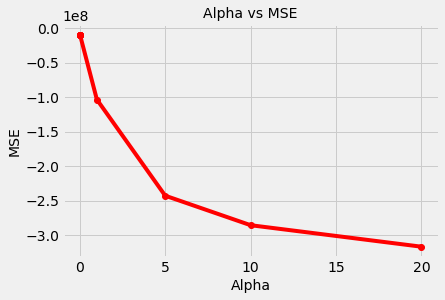

In [269]:
plt.plot(alpha, MSE_scores, color='red', marker='o')
plt.title('Alpha vs MSE', fontsize=14)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.grid(True)
plt.show()

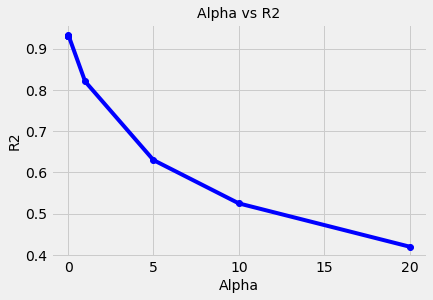

In [270]:
plt.plot(alpha, r2_scores, color='b', marker='o')
plt.title('Alpha vs R2', fontsize=14)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('R2', fontsize=14)
plt.grid(True)
plt.show()

In [271]:
r = Ridge(alpha = 0.0001)
r.fit(x_train_filtered_23,y_train)
pp = r.predict(x_test_filtered_23)
r.score(x_test_filtered_23,y_test)

0.9381740371677649

# RandomForestRegressor

In [272]:
rf = RandomForestRegressor(random_state=0)
rf.fit(x_train_filtered_23,y_train)
rf_y_pred = rf.predict(x_test_filtered_23)

In [273]:
print("Coefficient of determination: %.2f" % r2_score(y_test, rf_y_pred))

Coefficient of determination: 0.93


In [274]:
rf.score(x_test_filtered_23,y_test)

0.9272500523087458

# AdaBoostRegressor


In [275]:
adb = AdaBoostRegressor(random_state=0, n_estimators=10)
adb.fit(x_train_filtered_23,y_train)
adb_y_pred = adb.predict(x_test_filtered_23)

In [276]:
print("Coefficient of determination: %.2f" % r2_score(y_test, adb_y_pred))

Coefficient of determination: 0.84


In [277]:
adb.score(x_test_filtered_23,y_test)

0.8378416652018146

# ExtraTreeRegressor

In [278]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(x_train_filtered_23,y_train)
etr_y_pred = etr.predict(x_test_filtered_23)

In [279]:
print("Coefficient of determination: %.2f" % r2_score(y_test, etr_y_pred))

Coefficient of determination: 0.96


In [280]:
etr.score(x_test_filtered_23,y_test)

0.9582403217062647

# GradientBoostingRegressor

In [281]:
gbr = GradientBoostingRegressor(random_state=0).fit(x_train_filtered_23,y_train)
gbr_y_pred = gbr.predict(x_test_filtered_23)

In [282]:
print("Coefficient of determination: %.2f" % r2_score(y_test, gbr_y_pred))

Coefficient of determination: 0.96


In [283]:
gbr.score(x_test_filtered_23,y_test)

0.9557458347814063

# Polynomial regression

In [284]:
x_train_filtered_23.shape

(1772, 23)

In [347]:
from numpy.ma.core import reshape
p_reg = PolynomialFeatures(include_bias=False)
poly_features = p_reg.fit_transform(df_encoded[feature_cols_23])
poly_features.shape

(2215, 299)

In [354]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly= train_test_split(poly_features,df1.crimes,test_size=0.2,random_state=42,shuffle=True)

In [355]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train_poly)


LinearRegression()

In [356]:
y_predicted = poly_reg_model.predict(X_test_poly)

In [357]:
print("Coefficient of determination: %.2f" % r2_score(y_test_poly, y_predicted))


Coefficient of determination: 0.90


In [358]:
poly_reg_model.score(X_test_poly,y_test_poly)

0.9044331288080271

# Done

# Filter on only P-value < 0.05 (5%)

In [159]:
feature_cols_5p = df_encoded.columns[lr.pvalues.drop('const') < 0.05]
feature_cols_5p

Index(['LandArea', 'MedRent', 'MedRentPctHousInc', 'OwnOccLowQuart',
       'OwnOccMedVal', 'PctEmploy', 'PctForeignBorn', 'PctHousLess3BR',
       'PctRecImmig5', 'PctVacMore6Mos', 'PctVacantBoarded', 'PctWOFullPlumb',
       'RentMedian', 'medIncome', 'population', 'racePctAsian'],
      dtype='object')

In [160]:
x_train_filtered_15 = X_train[feature_cols_5p]
x_test_filtered_15 = X_test[feature_cols_5p]

In [161]:
lr_15 = LinearRegression().fit(x_train_filtered_15,y_train)
lr_15_y_pred = lr_15.predict(x_test_filtered_15)


In [162]:
print("Coefficient of determination: %.2f" % r2_score(y_test, lr_15_y_pred))

Coefficient of determination: 0.94


In [163]:
lr_15.score(x_test_filtered_15,y_test)

0.9377397692968094

In [164]:
lr_15.score(x_train_filtered_15,y_train)

0.9828383343211342